# Code to detect multiple cells and tracking cell trajectories

In [1]:
# To manipulate arrays
import pandas as pd
import pathlib
import sys
import matplotlib.pyplot as plt 

# Plotting
current_dir = pathlib.Path().absolute()
rsnaped_dir = current_dir.parents[0].joinpath('rsnaped')
sys.path.append(str(rsnaped_dir))
import rsnaped as rsp
import numpy as np
from ipywidgets import  VBox 

from scipy.ndimage.measurements import center_of_mass



In [2]:
# Defining directories
video_dir = current_dir.parents[0].joinpath('DataBases','Jacks_Data')
#video_dir = current_dir.parents[0].joinpath('DataBases','Erics_Data')

#video_dir = current_dir.parents[0].joinpath('DataBases','Hela')

In [3]:
# Load videos 
path_files, list_files_paths, list_videos, num_videos = rsp.Utilities.read_files_in_directory(directory=video_dir, extension_of_files_to_look_for = 'tif',return_images_in_list=True)

#max_frames_to_read = 10
#list_videos[0] = list_videos[0][0:max_frames_to_read,:,:,:]

In [4]:
list_videos[0].shape

(49, 5, 512, 512)

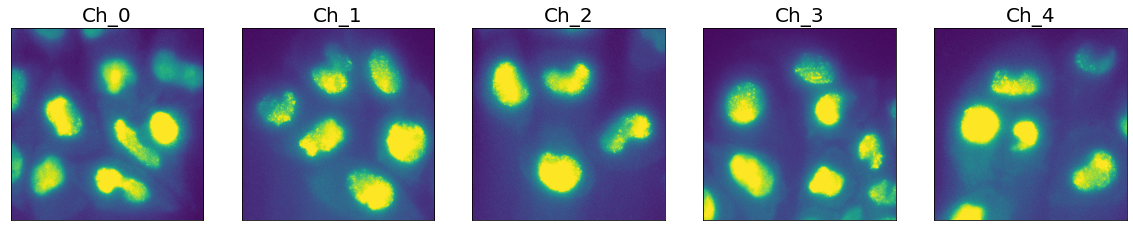

In [5]:
num_colors = list_videos[0].shape[1]
_, axes = plt.subplots(nrows = 1, ncols = num_colors, figsize = (20, 5))
for i in range (0, num_colors):
    temp_img =rsp.RemoveExtrema(list_videos[0][0,i,:,:], min_percentile = 0.5, max_percentile = 95,format_video = 'YX').remove_outliers()
    axes[i].imshow(temp_img)
    axes[i].grid(False)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_title('Ch_'+str(i), fontsize=20 )

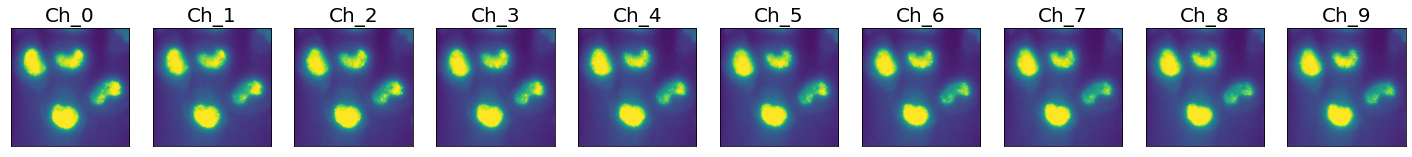

In [6]:
number_time_points = 10#list_videos[0].shape[0]
selected_movie = 2
_, axes = plt.subplots(nrows = 1, ncols = number_time_points, figsize = (25, 6))
for i in range (0, number_time_points):
    temp_img =rsp.RemoveExtrema(list_videos[0][i,selected_movie,:,:], min_percentile = 0.5, max_percentile = 96,format_video = 'YX').remove_outliers()
    axes[i].imshow(temp_img)
    axes[i].grid(False)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_title('Ch_'+str(i), fontsize=20 )

In [7]:
tensor_video = list_videos[0][:,selected_movie,:,:]
tensor_video_expanded =  tensor_video.reshape(tensor_video.shape + (1,))
tensor_video_expanded =rsp.RemoveExtrema(tensor_video_expanded, min_percentile = 0.5, max_percentile = 95,format_video='TYXC').remove_outliers()
tensor_video_expanded.shape

(49, 512, 512, 1)

In [8]:
# Plot only selected trajectories
#plt.rcParams['figure.figsize'] = [5,5]
controls_pr, output_pr = rsp.VisualizerVideo(tensor_video_expanded,normalize=False,step_size_in_sec=1).make_video_app()
display(VBox([controls_pr, output_pr]))

# Cell segmentation for all time points

In [22]:
# removing extrema
#tensor_video_expanded =rsp.RemoveExtrema(tensor_video_expanded, min_percentile = 0.5, max_percentile = 92,format_video='TYXC').remove_outliers()
list_masks_in_images=[]
for i in range(0, tensor_video_expanded.shape[0]):
    list_masks_in_images.append(rsp.Cellpose(video= tensor_video_expanded[i,:,:,0], num_iterations = 4, channels = [0,0], diameter = 100, model_type = 'cyto', selection_method = 'max_cells').calculate_masks())


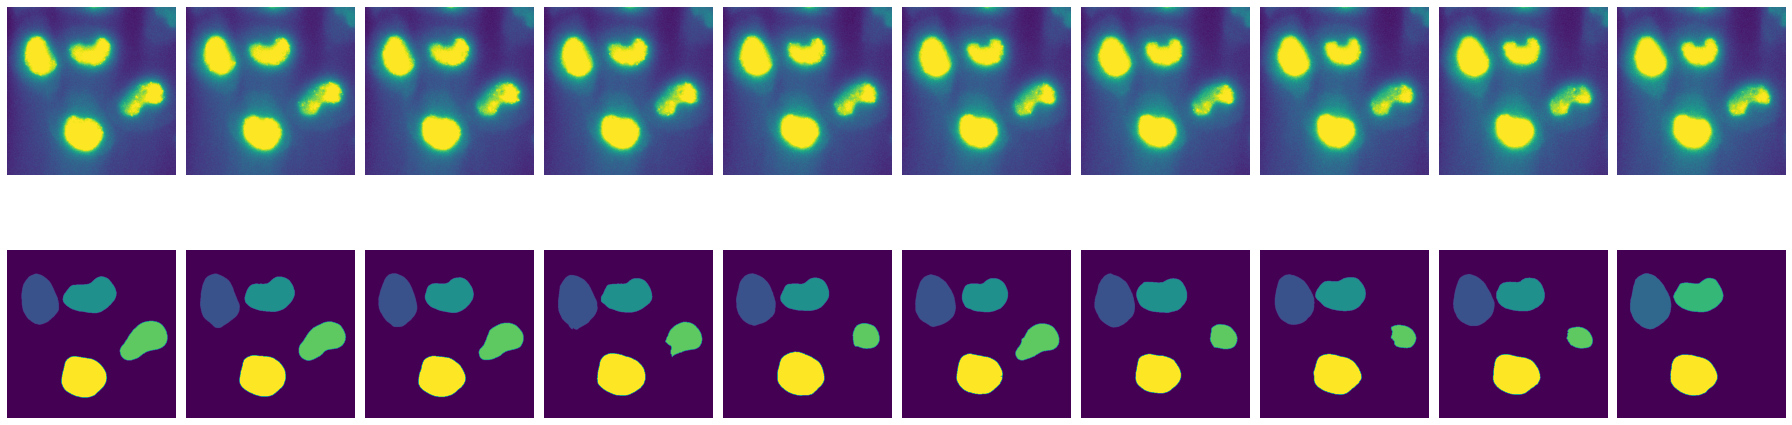

In [17]:
number_time_points = 10 #list_videos[0].shape[0]
selected_movie = 0
_, axes = plt.subplots(nrows = 2, ncols = number_time_points, figsize = (25, 8))
for i in range (0, number_time_points):
    axes[0,i].imshow(tensor_video_expanded[i,:,:,0])
    axes[1,i].imshow(list_masks_in_images[i])
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout()

In [23]:
# Calculate the centroids for each mask
list_centroids = []
for i in range(0, len(list_masks_in_images)):
    mask = list_masks_in_images[i] 
    cell_labels = np.unique(mask)[1:]
    # Calculate the center of mass for each cell
    centers_of_mass = {label: center_of_mass(mask == label) for label in cell_labels}
    print(centers_of_mass)
    list_centroids.append(centers_of_mass)  
    

{1: (153.0625333231777, 97.23627085078833), 2: (142.0748726925525, 254.01249204328454), 3: (275.85662200346366, 415.09379272627837), 4: (386.997011356844, 230.51733413030485)}
{1: (156.8799833310182, 98.45659119322129), 2: (139.51324139098062, 256.0762331838565), 3: (276.4922545726017, 411.66349384098544), 4: (383.3030957523398, 230.42814974802016)}
{1: (156.16910052910052, 97.39019400352734), 2: (140.6900925608502, 257.44849160095987), 3: (278.33576642335765, 412.88635442011355), 4: (385.6905816571055, 230.20731972986712)}
{1: (160.5343706777317, 98.15580912863071), 2: (142.13438902531968, 253.00482682699635), 3: (269.23688619667485, 423.7921123856167), 4: (380.32792496748135, 231.22783596905595)}
{1: (154.37594401718283, 97.2500519642486), 2: (139.64388878859, 250.28822892218813), 3: (263.9407816818002, 432.38551125148047), 4: (378.4795751633987, 233.35913671023965)}
{1: (158.1953326983263, 98.93890325214315), 2: (141.4976410814734, 252.59363091997824), 3: (279.61735344095155, 410.86

In [25]:
list_centroids[0]

{1: (153.0625333231777, 97.23627085078833),
 2: (142.0748726925525, 254.01249204328454),
 3: (275.85662200346366, 415.09379272627837),
 4: (386.997011356844, 230.51733413030485)}

In [ ]:
number_time_points = 10 #list_videos[0].shape[0]
selected_movie = 0
_, axes = plt.subplots(nrows = 2, ncols = number_time_points, figsize = (25, 8))
for i in range (0, number_time_points):
    selected_masks = rsp.Cellpose(video= tensor_video_expanded[i,:,:,0], num_iterations = 4, channels = [0,0], diameter = 100, model_type = 'nuclei', selection_method = 'max_area').calculate_masks() # options are 'max_area' or 'max_cells'
    temp_img =rsp.RemoveExtrema(tensor_video_expanded[i,:,:,0], min_percentile = 0.5, max_percentile = 99,format_video='YX').remove_outliers()
    axes[0,i].imshow(temp_img)
    axes[1,i].imshow(selected_masks)

plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout()